In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

- Age:The age of the individual, expressed in years
- Gender:The gender of the individual, categorized as male or female.
- Height:The height of the individual, typically measured in centimeters or inches.
- Weight:The weight of the individual, typically measured in kilograms or pounds.
- BMI:A calculated metric derived from the individual's weight and height
- PhysicalActivityLevel: This variable quantifies the individual's level of physical activity
- ObesityCategory: Categorization of individuals based on their BMI into different obesity categories

In [53]:
df = pd.read_csv("obesity_data.csv")
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [55]:
df['Gender'].value_counts()

Gender
Male      523
Female    477
Name: count, dtype: int64

In [56]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['ObesityCategory'] = df['ObesityCategory'].map({'Normal weight':1,'Overweight':2,'Obese':3,'Underweight':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int64  
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [57]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

### EDA

### Histogram (for distribution)

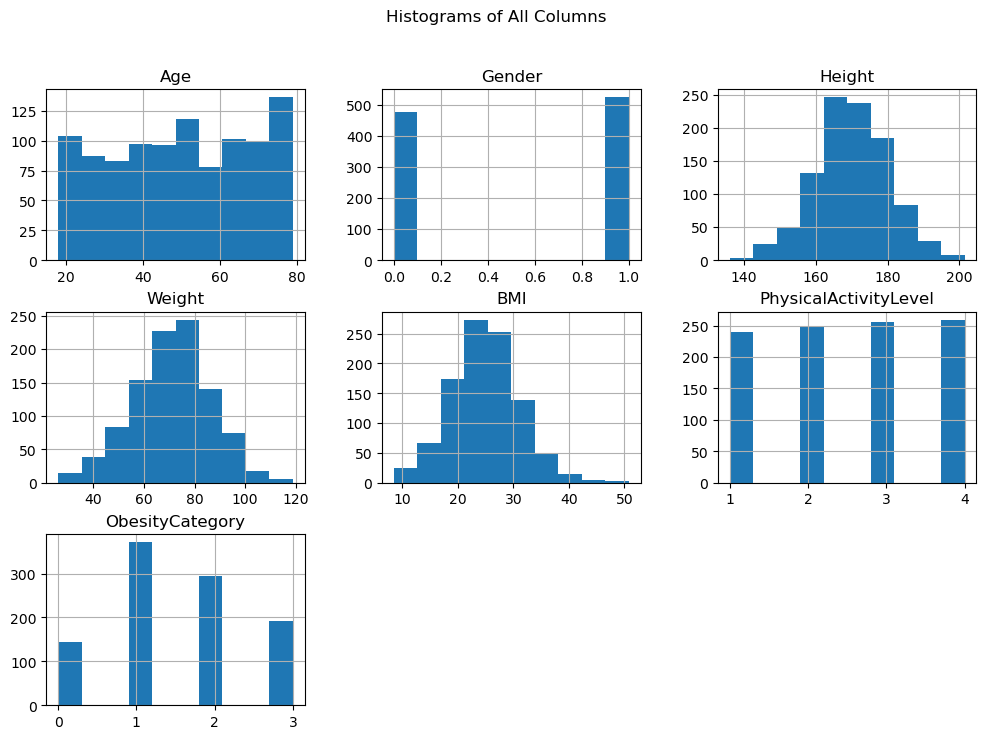

In [58]:
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of All Columns')
plt.show()

### Boxplot (for outlier detection)

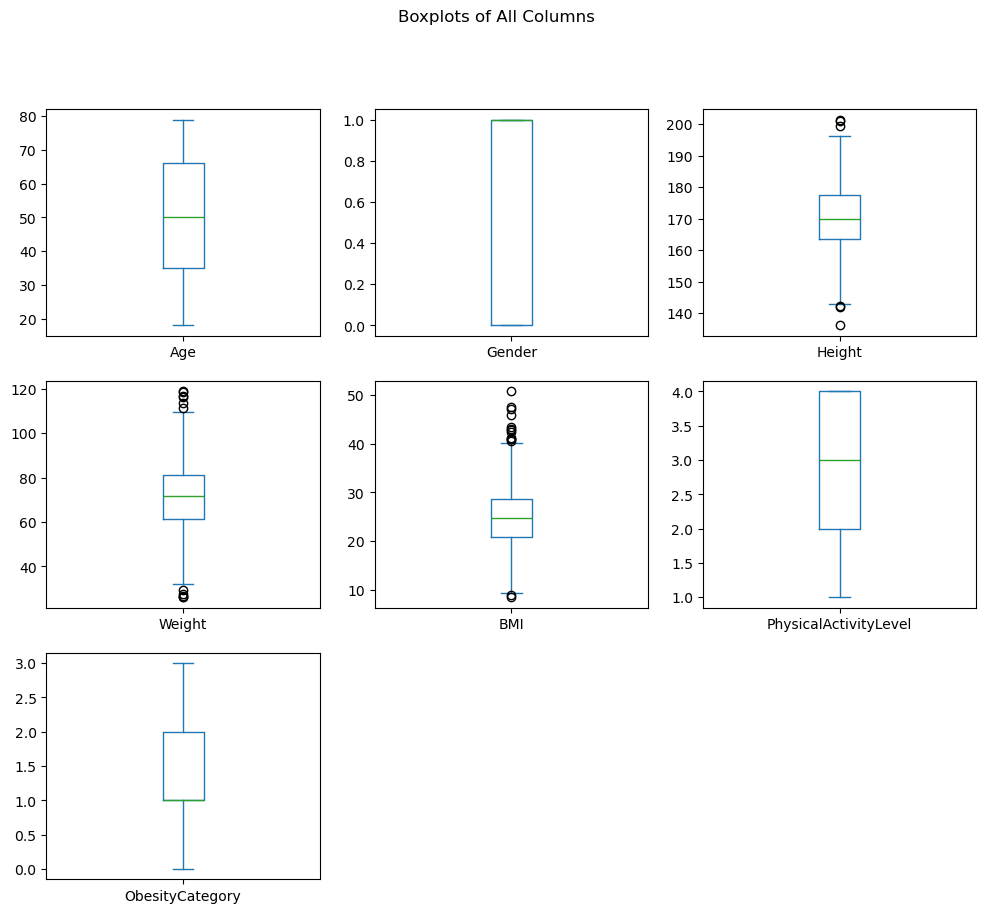

In [59]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of All Columns')
plt.show()


### Scatter plot matrix (for relationships between variables)

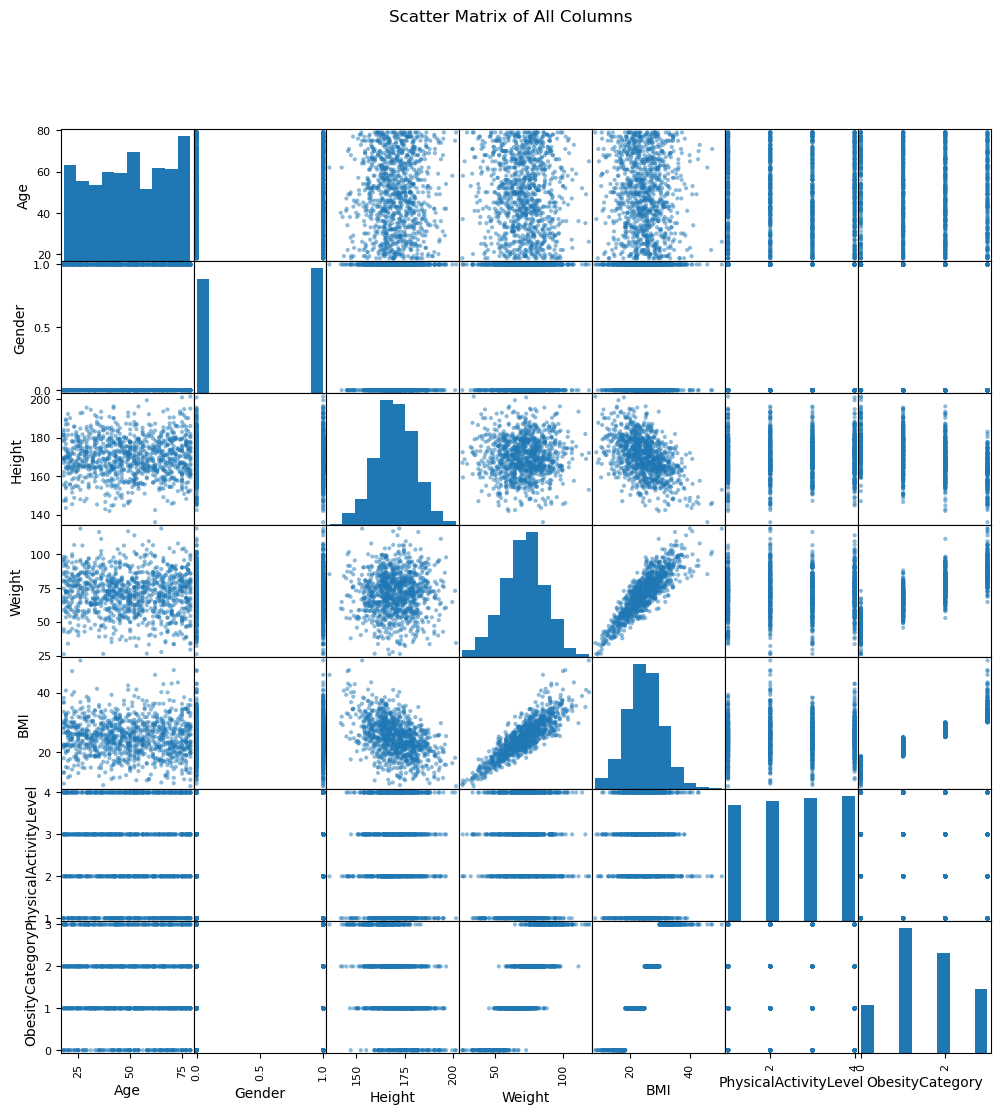

In [60]:
scatter_matrix(df, figsize=(12, 12))
plt.suptitle('Scatter Matrix of All Columns')
plt.show()

### Line plot

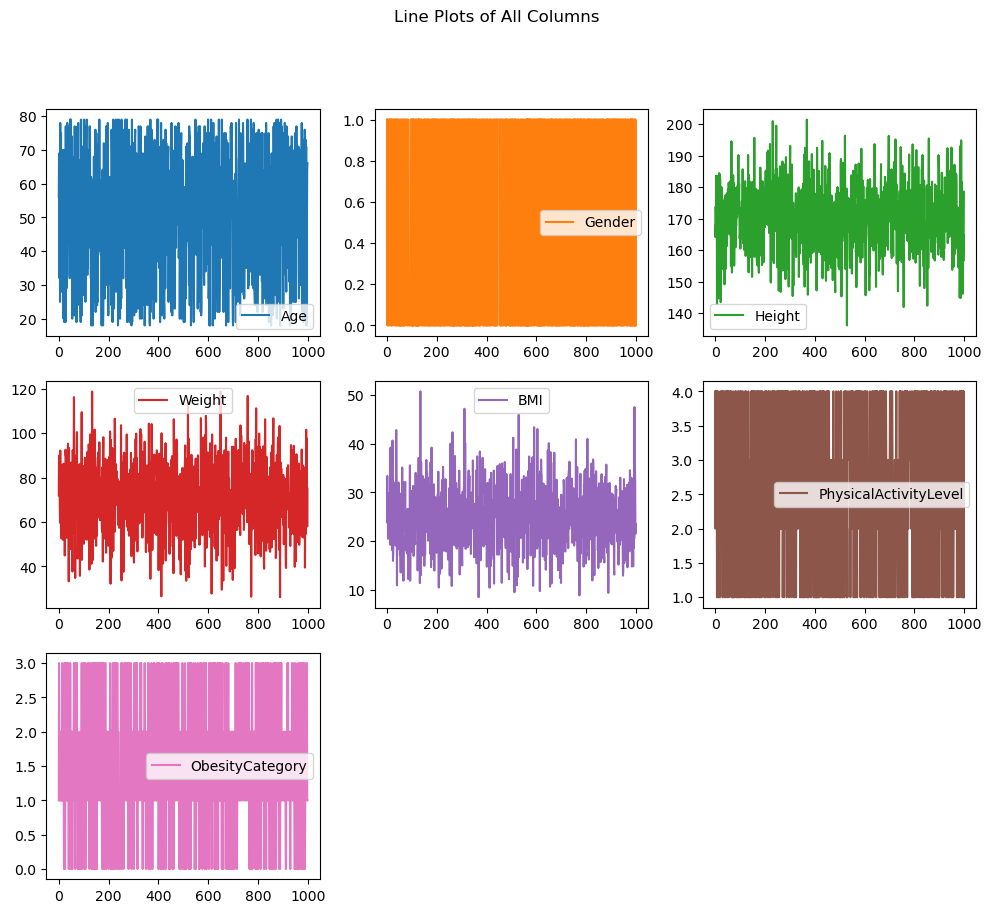

In [61]:
df.plot(kind='line', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Line Plots of All Columns')
plt.show()

### Bar plot

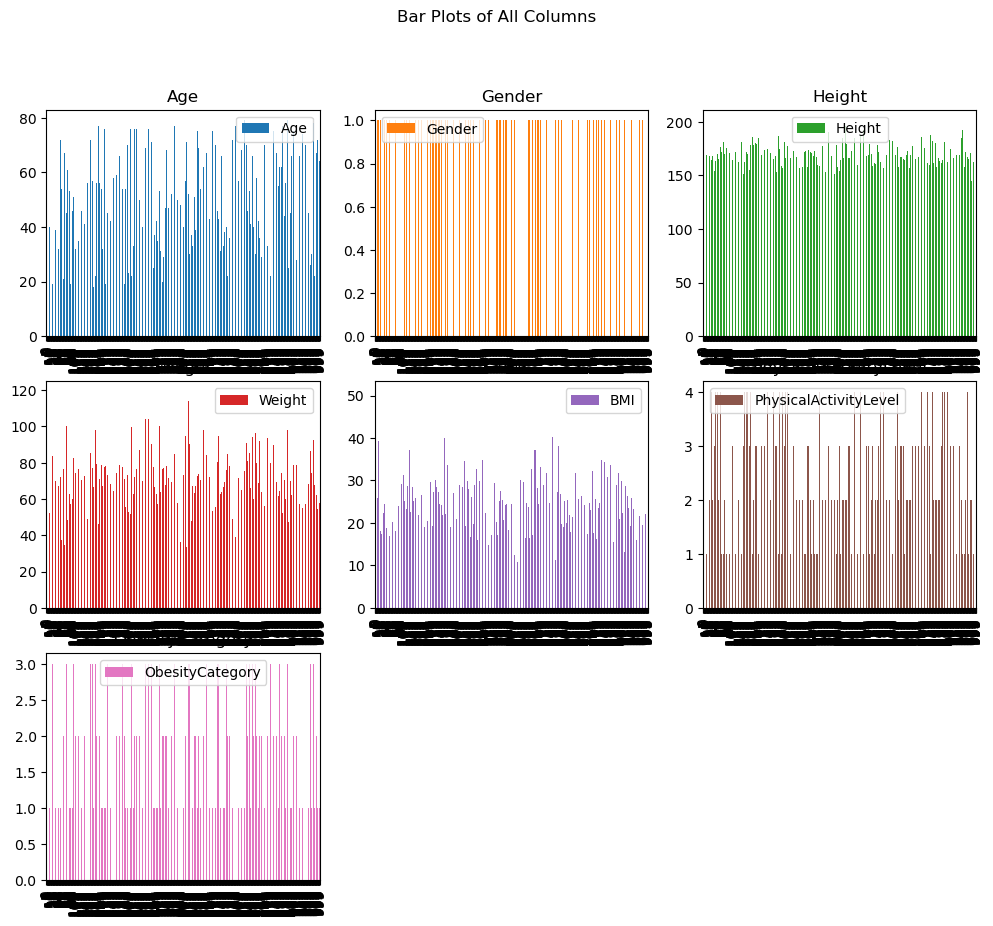

In [62]:
df.plot(kind='bar', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle('Bar Plots of All Columns')
plt.show()

### Correlation heatmap (to show relationships between columns)

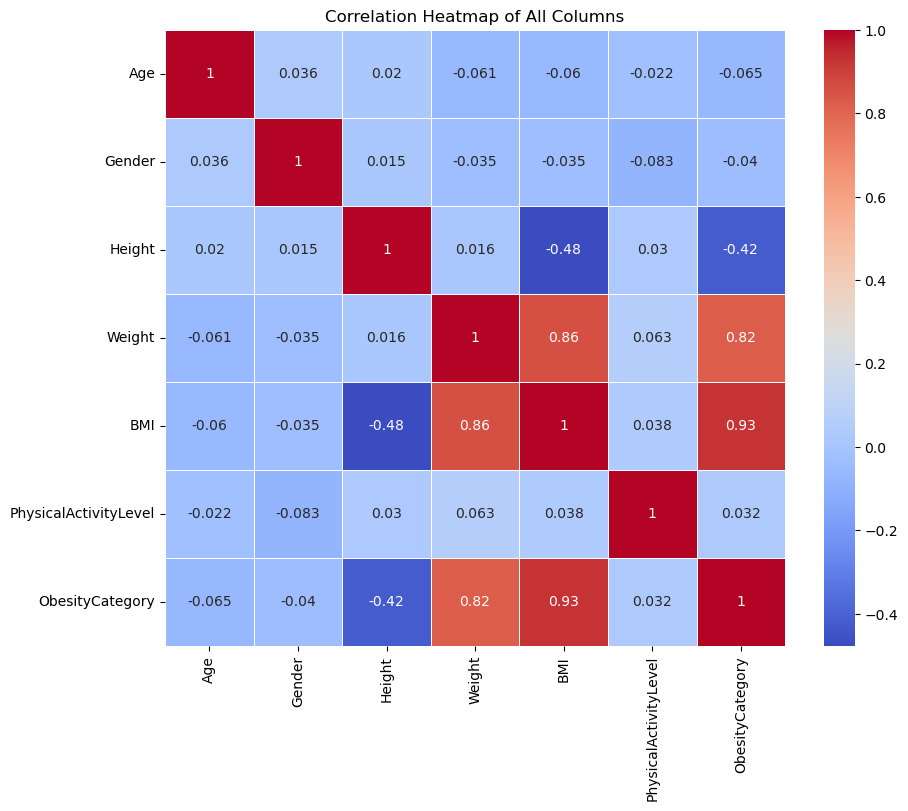

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

In [64]:
df.columns.tolist()

['Age',
 'Gender',
 'Height',
 'Weight',
 'BMI',
 'PhysicalActivityLevel',
 'ObesityCategory']

In [66]:
continues_data = ['Height','Weight','BMI']
def handle_outliers_and_missing(df, column_names, threshold=3):
    """
    Replacing the missing values with mean and detecting the outliers with z-score and capping the outlier with the value
    of 3(z-score)
    """
    df = df.copy()
    for column_name in column_names:
        df['z_score'] = (df[column_name] - df[column_name].mean()) / df[column_name].std()

        std_dev = df[column_name].std()
        lower_threshold = df[column_name].mean() - threshold * std_dev
        upper_threshold = df[column_name].mean() + threshold * std_dev

        df.loc[df['z_score'] < -threshold, column_name] = lower_threshold
        df.loc[df['z_score'] > threshold, column_name] = upper_threshold

        df[column_name].fillna(df[column_name].mean(), inplace=True)

        # Drop Z-score column
        df.drop(columns=['z_score'], inplace=True)
    return df
df = handle_outliers_and_missing(df,continues_data)

C:\Users\aaari\AppData\Local\Temp\ipykernel_21508\2707570889.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df[column_name].mean(), inplace=True)
C:\Users\aaari\AppData\Local\Temp\ipykernel_21508\2707570889.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### Data modeling

In [67]:
X = df.drop(columns=['ObesityCategory'])
y = df['ObesityCategory']
# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size= 0.2)

In [68]:
# Display the class distribution before and after resampling
print(f"Original dataset shape: {np.bincount(y)}")
print(f"Resampled dataset shape: {np.bincount(y_resampled)}")

Original dataset shape: [143 371 295 191]
Resampled dataset shape: [371 371 371 371]


In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        81

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [70]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9663
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       0.98      0.91      0.95        68
           2       0.94      0.97      0.95        74
           3       0.99      0.98      0.98        81

    accuracy                           0.97       297
   macro avg       0.97      0.97      0.97       297
weighted avg       0.97      0.97      0.97       297



In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9394
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.95      0.90      0.92        68
           2       0.86      0.95      0.90        74
           3       0.97      0.93      0.95        81

    accuracy                           0.94       297
   macro avg       0.94      0.94      0.94       297
weighted avg       0.94      0.94      0.94       297



In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        81

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [73]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        81

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297

